# Cyclistic: Project with Python¶
## Introduction:
Welcome to the Cyclistic bike-share analysis case study! Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Characters and Teams:
- **Cyclistic**: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

- **Morgan Rose**: The director of marketing and your manager. Rose is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

- **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

- **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### About the company:
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Rose has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Business Task:
Understanding the nature of bike usage between annual members & casual members and to introduce strategy to increase the number of annual memberships.

# import our analysis library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import all datasets
tripdata_2020_04 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202004-divvy-tripdata.csv')
tripdata_2020_05 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202005-divvy-tripdata.csv')
tripdata_2020_06 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202006-divvy-tripdata.csv')
tripdata_2020_07 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202007-divvy-tripdata.csv')
tripdata_2020_08 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202008-divvy-tripdata.csv')
tripdata_2020_09 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202009-divvy-tripdata.csv')
tripdata_2020_10 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202010-divvy-tripdata.csv')
tripdata_2020_11 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202011-divvy-tripdata.csv')
tripdata_2020_12 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202012-divvy-tripdata.csv')
tripdata_2021_01 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202101-divvy-tripdata.csv')
tripdata_2021_02 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202102-divvy-tripdata.csv')
tripdata_2021_03 = pd.read_csv('C:/Users/there/notebook/csv files/DATA_BICYCLE_COMPANY/202103-divvy-tripdata.csv')

In [20]:
# check our data f0r consistency
tripdata_2020_04.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member


In [22]:
tripdata_2020_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131573 entries, 0 to 131572
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             131573 non-null  object 
 1   rideable_type       131573 non-null  object 
 2   started_at          131573 non-null  object 
 3   ended_at            131573 non-null  object 
 4   start_station_name  119874 non-null  object 
 5   start_station_id    119874 non-null  object 
 6   end_station_name    118336 non-null  object 
 7   end_station_id      118336 non-null  object 
 8   start_lat           131573 non-null  float64
 9   start_lng           131573 non-null  float64
 10  end_lat             131462 non-null  float64
 11  end_lng             131462 non-null  float64
 12  member_casual       131573 non-null  object 
dtypes: float64(4), object(9)
memory usage: 13.0+ MB


in the Dataset tripdata_2020_04 to tripdata_2020_11 the Data type of 'end_station_id' and 'start_station_id' is not 'Object'. Hence we need to first concat these dataset , the collectively change the data type of these columns

In [23]:
df = pd.concat([tripdata_2020_04,tripdata_2020_05,tripdata_2020_06,tripdata_2020_07,tripdata_2020_08,tripdata_2020_09,tripdata_2020_10,tripdata_2020_11])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983223 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 318.6+ MB


In [25]:
df['start_station_id'] = df['start_station_id'].apply(np.str_)
df.end_station_id = df['end_station_id'].apply(str)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983223 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 318.6+ MB


In [27]:
# let concat the rest of the dataset
bikeshare = pd.concat([df, tripdata_2020_12,tripdata_2021_01, tripdata_2021_02,tripdata_2021_03])

In [28]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


# EDA 

In [30]:
# we will look for the null values and duplicate values

bikeshare.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id       39218
end_station_name      143242
end_station_id         45599
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [32]:
# remove missing values
bikeshare.dropna(inplace=True)

In [33]:
bikeshare.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [34]:
# check for duplicate
bikeshare[bikeshare.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [36]:
bikeshare.drop_duplicates(inplace=True)

In [41]:
# convert started_at and end_at to datetime
bikeshare['started_at'] = pd.to_datetime(bikeshare['started_at'], dayfirst=True, errors='coerce' )
bikeshare['ended_at'] = pd.to_datetime(bikeshare['ended_at'], dayfirst=True, errors='coerce' )

C:\Users\there\AppData\Local\Temp\ipykernel_17660\3269617903.py:3: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  bikeshare['ended_at'] = pd.to_datetime(bikeshare['ended_at'], dayfirst=True, errors='coerce' )


In [42]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3295563 entries, 0 to 228494
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 352.0+ MB


In [43]:
# we will create column for hour,day and month
bikeshare['hour'] = bikeshare['started_at'].apply(lambda x : x.hour)
bikeshare['day'] = bikeshare['started_at'].apply(lambda x : x.day_name())
bikeshare['month'] = bikeshare['started_at'].apply(lambda x : x.month)

In [44]:
bikeshare.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,month
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4


In [46]:
import datetime as datetime
from datetime import timedelta

In [47]:
# create a column for the total time  spent riding the bike in minute 'total_ride_time'
bikeshare['total_ride_time'] = bikeshare['ended_at'] - bikeshare['started_at']
bikeshare['total_ride_time'] = bikeshare['total_ride_time']/timedelta(minutes=1)
bikeshare['total_ride_time'] = bikeshare['total_ride_time'].round(decimals=2)


In [48]:
bikeshare.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,month,total_ride_time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4,26.82
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4,8.15
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,17,Wednesday,4,14.38


In [51]:
# lets calculate the ride distance in kms from given coordinates
from math import sin, radians, cos, sqrt, atan2

def haversine(df):
    lat1,lng1 = radians(df['start_lat']), radians(df['start_lng'])
    lat2,lng2 = radians(df['end_lat']), radians(df['end_lng'])
    
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    x = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2) ** 2
    y = 2 * atan2(sqrt(x), sqrt(1-x))
    radius_of_earth = 6371
    distance = radius_of_earth * y
    
    return distance


bikeshare['distance'] = bikeshare.apply(haversine,axis=1)

In [52]:
bikeshare['distance'] = bikeshare['distance'].round(decimals=2)

In [53]:
bikeshare.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,month,total_ride_time,distance
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4,26.82,3.99
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4,8.15,0.98


In [55]:
# convert month to month name
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

bikeshare['month_name'] = bikeshare['month'].map(month)

In [56]:
bikeshare

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,month,total_ride_time,distance,month_name
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member,17,Sunday,4,26.82,3.99,April
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member,17,Friday,4,8.15,0.98,April
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member,17,Wednesday,4,14.38,2.99,April
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member,12,Tuesday,4,12.20,2.14,April
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual,10,Saturday,4,52.92,9.13,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228490,081549DEA616CA22,electric_bike,2021-03-14 01:59:38,2021-03-14 03:13:09,Larrabee St & Armitage Ave,TA1309000006,New St & Illinois St,TA1306000013,41.918129,-87.643749,41.890808,-87.618779,member,1,Sunday,3,73.52,3.67,March
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,14,Saturday,3,143.85,1.20,March
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,11,Tuesday,3,8.45,1.66,March
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,11,Tuesday,3,41.58,9.32,March


# data analysis and visualisation

In [57]:
sns.set_style('whitegrid')

<Axes: xlabel='member_casual', ylabel='distance'>

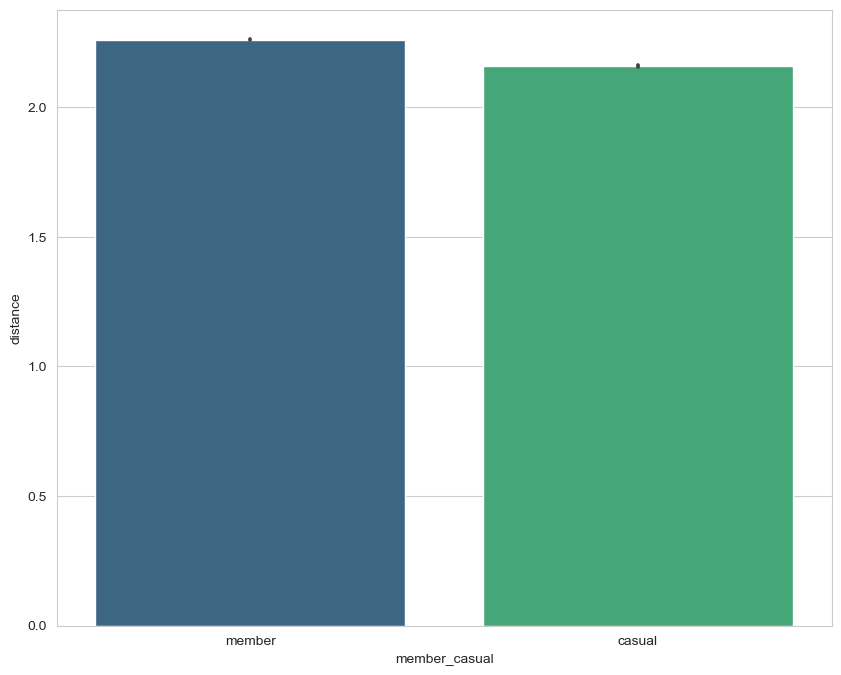

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x='member_casual',y='distance', data=bikeshare,palette='viridis')

<Axes: xlabel='member_casual', ylabel='total_ride_time'>

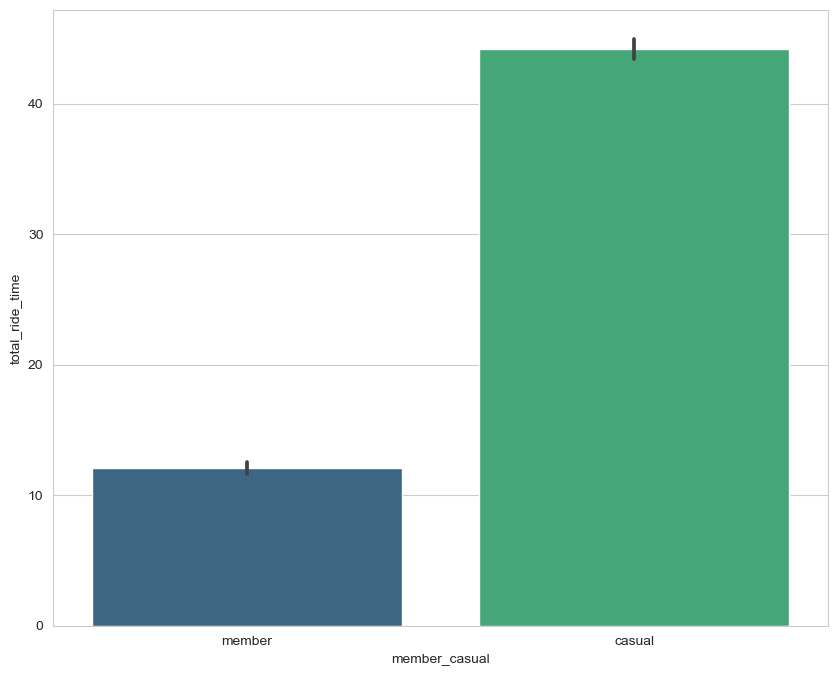

In [59]:
plt.figure(figsize=(10,8))
sns.barplot(x='member_casual',y='total_ride_time', data=bikeshare,palette='viridis')

- In the first plot, we observe that the member riders have travelled longer distance than the casual riders. However the second plot for 'Total Ride Time' shows casual bikers have more ride time than the member bikers.

- We can conclude from the above observations that member riders have short journeys compared to casual ones. Their travel frequency is higher but travel time is lower.

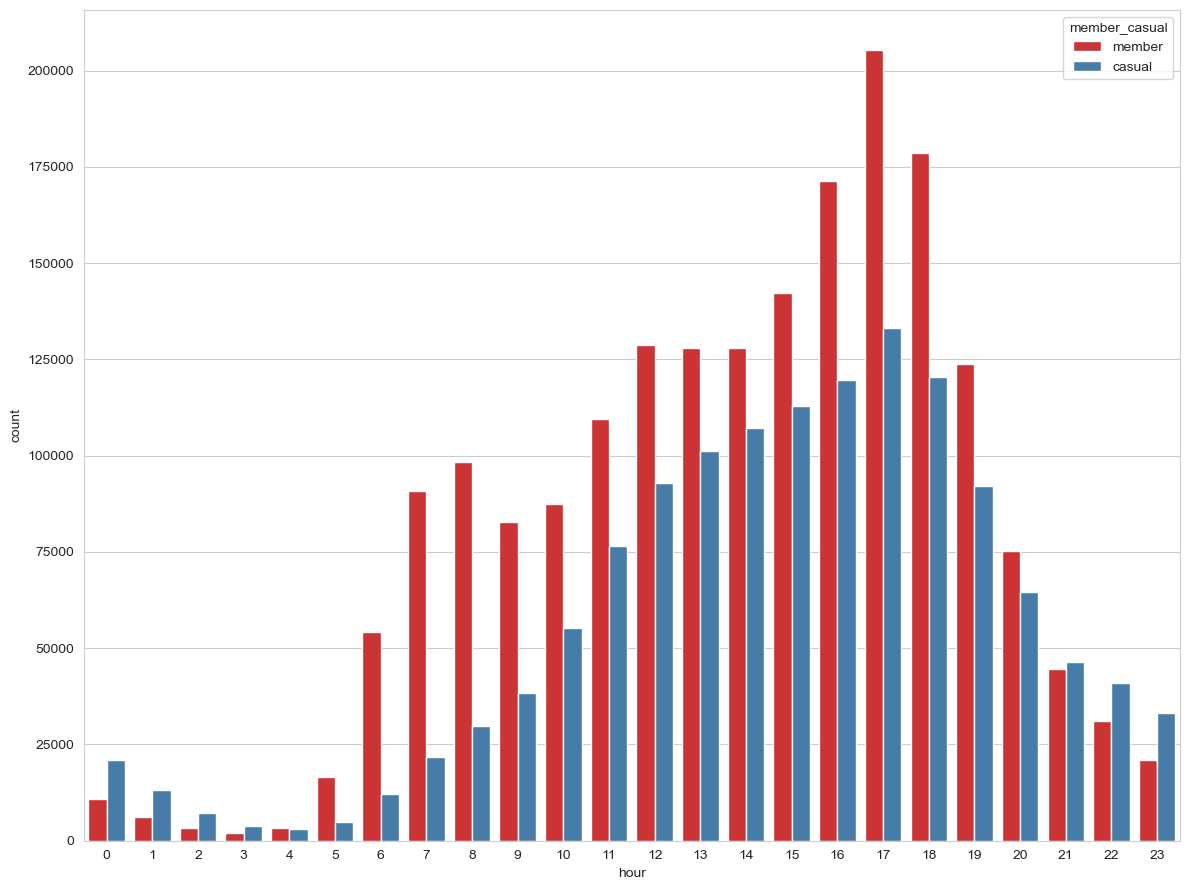

In [62]:
plt.figure(figsize=(12,9))
sns.countplot(x='hour', hue='member_casual', data=bikeshare, palette='Set1')
plt.tight_layout()

- Evening hours see a lot of traffic compared to other timings. This is largly because of office timings of member riders. Casual member also find evening hours productive to go for a ride.

- Morning hours are again busy for member riders due to working hours. Casual members are using bikes for rides at late night somewhere around 9-11 PM.

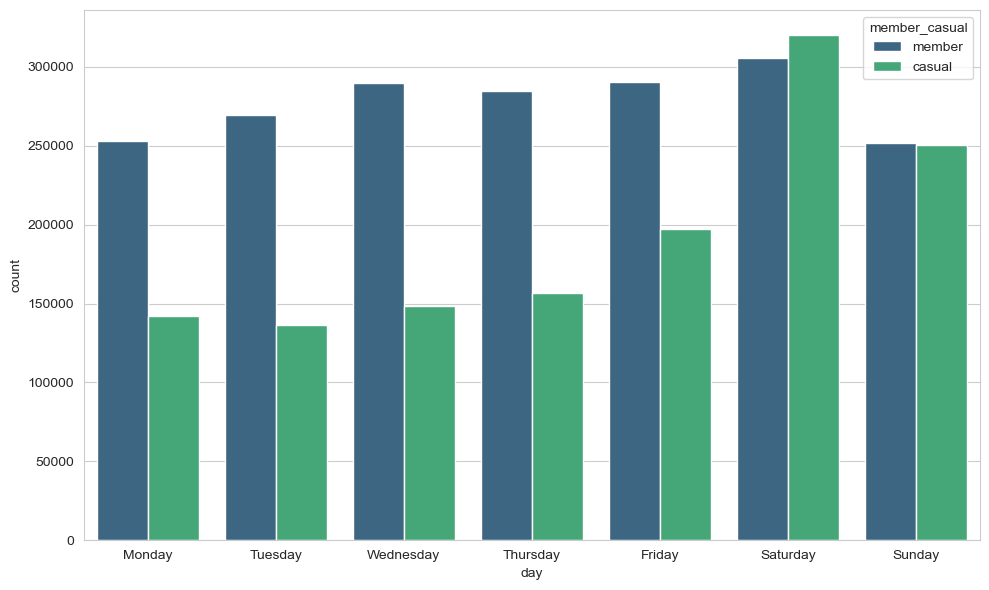

In [64]:
plt.figure(figsize=(10,6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='day', hue='member_casual', data=bikeshare, palette='viridis', order=order)
plt.tight_layout()

- Casual riders are enthuasiatic on weekends as they have the highest bike usage on Saturday and Sunday.

- Member riders have consistent use of bikes on weekdays.

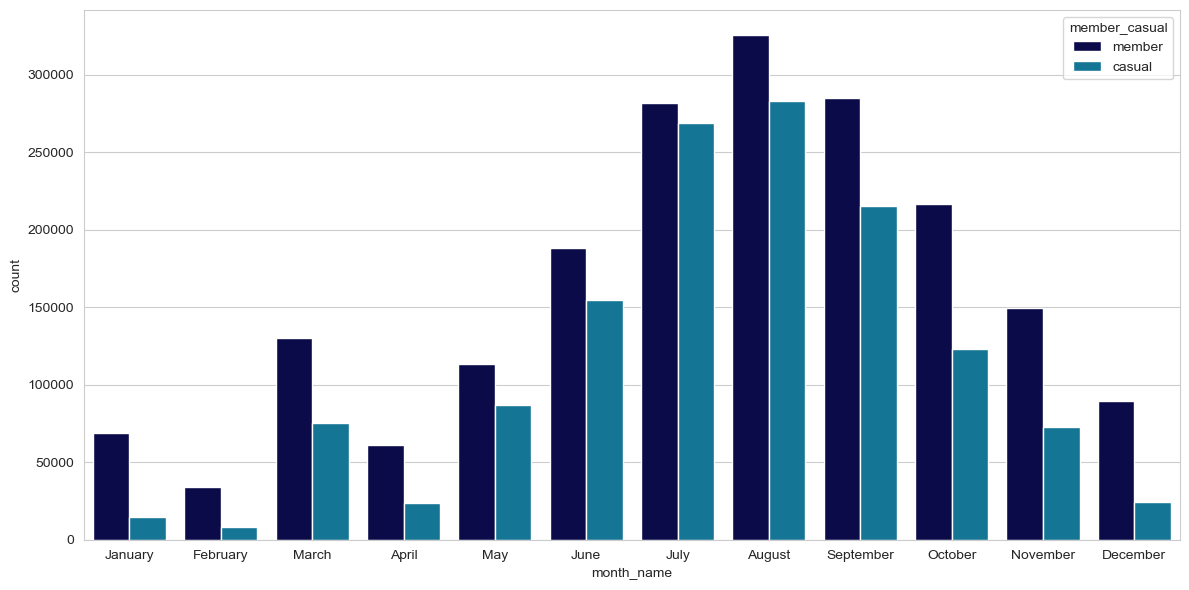

In [65]:
plt.figure(figsize=(12,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
sns.countplot(x='month_name', hue='member_casual', data=bikeshare, palette='ocean', order=order)
plt.tight_layout()

# Conclusion and Recommendation


- Member riders have annual memberships because their frequency of bike usage is higher. They use it for daily commute of shorter distance.

- Casual riders more often use bikes for leisure or personal activities. Their usage is higher on weekends.

- Summer months are more popular and business can focus on this period to maximise its profit.

- Special 'Summer Membership' can be introduced specifically for casual riders who're hesitant to go for annual membership.

- Coupons, Discounts schemes can be introduced for casual riders to increase their bike usage on weekdays or small distance journeys.

- It is important for business to develop the idea of using bikes regulary than just for leisure activities in casual riders.

- Running google and facebook ads targeting people interested in bike whose distance to work is with 10 mins ride